In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

def chi_square(x : list, observed : list, m, b, uncertainties) -> float: 
    lst = []
    err = uncertainties
    for i in range(len(observed)): 
        lst.append(((observed[i] - (x[i] * m + b)) / err[i]) ** 2)
    return sum(lst)

def average(lst): 
    return sum(lst) / len(lst)

def uncert(xlst): 
    avg = average(xlst)
    s = 0
    for x in xlst: 
        s += (x - avg) ** 2
    return (s / (len(xlst) - 1)) ** 0.5


def get_diffraction_grating(n, theta, lmbda) -> float: 
    sin_theta = np.sin(theta * math.pi / 180)
    return n * lmbda / sin_theta

def get_theta(n, d, lmbda) -> float: 
    prod = n * lmbda / d
    return np.arcsin(prod)

def get_lambda(n, d, theta) -> float: 
    prod = d * np.sin(theta * math.pi / 180 ) / n
    return abs(prod)

def linear_fit(xlst, ylst, err): 
    plt.errorbar(x, y, yerr = err, fmt = "o")
    xlst = np.array(xlst)
    ylst = np.array(ylst)
    [m, b], V = np.polyfit(xlst, ylst, 1, cov = True)
    plt.plot(xlst, m * xlst + b)
    m_err, b_err = V[0][0], V[1, 1]
    print(f"Rydberg Constant: {m:.2e} +/- {np.sqrt(m_err):.2e}")
#     print("b parameter: " + str(b) + " +/- " + str(np.sqrt(b_err)))
    
    plt.show()
    return m, b

In [4]:
order_0 = 200.51
lmbda_Hg = 435.835 * 10 ** -9
order_minus_one = average([216 + 23/60, 216.5 + 22/60, 217 + 23/60])
order_one = average([185 + 12/60, 185.5 + 11/60, 185 + 11/60])

d_minus_two = get_diffraction_grating(-2, 30.9, lmbda_Hg)
d_minus_one = get_diffraction_grating(-1, 16.4, lmbda_Hg)
d_one = get_diffraction_grating(1, 15.1, lmbda_Hg)
d_two = get_diffraction_grating(2, 31.5, lmbda_Hg)
                                
                            
print(f"N = -2: {get_diffraction_grating(-2, 30.9, lmbda_Hg):.2e}")
print(f"N = -1: {get_diffraction_grating(-1, 16.4, lmbda_Hg)}")
print(f"N = 1: {get_diffraction_grating(1, 15.1, lmbda_Hg)}")
print(f"N = 2: {get_diffraction_grating(2, 31.5, lmbda_Hg)}")

N = -2: -1.70e-06
N = -1: -1.5436450773948616e-06
N = 1: 1.673042060849182e-06
N = 2: 1.66827252525349e-06


In [5]:
d_list = list(map(lambda x : abs(x), [d_minus_two, d_minus_one, d_one, d_two]))
d = average(d_list)
d_uncert = uncert(d_list)

print(f"d: {d} +\- {d_uncert}m")
print(f"Lines per grating: {1/d / 1000} +/- {1/d_uncert/1000000} lines / mm")

d: 1.6455826519771415e-06 +\- 6.914271672860105e-08m
Lines per grating: 607.6874952458425 +/- 14.462839288268052 lines / mm


{'purple': 4.309255487960944e-07, 'cyan': 4.796449520683354e-07, 'red': 6.583255052452728e-07}
{'purple': 1.5560633444643128e-08, 'cyan': 2.3549545122479793e-08, 'red': 8.797555351811073e-08}
Rydberg Constant: 1.13e+07 +/- 2.78e+05


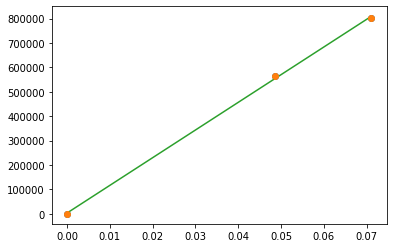

In [35]:
data = {
    
    "purple": {1 : 14.5, 2 : 31.1, -1 : 15.5, -2 : 32.9},
    "cyan" : {1 : 17.4, 2 : 35.2, 3 : 59.4, -1 : 15.5, -2 : 36.7, -3 : 67.8}, 
    "red" : {1 : 23.1, 2 : 51.4, -1 : 28.5, -2 : 55.5, -3 : 79.7},
    
}

lambdas = {"purple" : 0, "cyan" : 0, "red" : 0}
uncertainties = {}

for color, measurements in data.items():
    lst = []
    for n, theta in measurements.items(): 
        lst.append(get_lambda(n, d, theta))
        
    lambdas[color] = average(lst)
    uncertainties[color] = uncertainties.get(color, 0) + uncert(lst)

print(lambdas)
print(uncertainties)

x = [1/4 - 1/9 - (1/4 - 1/9), 1/4 - 1/16 - (1/4 - 1/9), 1/4 - 1/25 - (1/4 - 1/9)]
y = [1/lambdas["red"] - 1/lambdas["red"], 1/lambdas["cyan"] - 1/lambdas["red"], 1/lambdas["purple"] - 1/lambdas["red"]]


plt.plot(x, y, "o")
linear_fit(x, y, list(map(lambda x : x * 0.1, x)))
plt.show()

In [28]:
def get_R(lmbda, m): 
    return 1 / (lmbda * (1 / 4 - 1/m**2))

R_list = [get_R(lambdas["red"], 3), get_R(lambdas["cyan"], 4), get_R(lambdas["purple"], 5)]


R = average(R_list)
R_uncert = uncert(R_list)
print(f"Rydberg Constant: {R:.3e} +/- {R_uncert:.2e}")

Rydberg Constant: 1.104e+07 +/- 9.22e+04
